In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from imblearn.metrics import classification_report_imbalanced

### 1.	Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.

In [17]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [18]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

SMOTEEN uses ENN algorithm before resampling.ENN(Edited Nearest Neighbor) is an undersampling technique that looks for noise in data, it computes KNN for every minority class example, and depending on them it decides if among those samples exists an imposter, if yes, then this example will be deleted.
After the ENN technique, we simply apply SMOTE to oversample minority class examples.

In [19]:
y=diabetes['Outcome'].values 
X=diabetes.drop('Outcome',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42,stratify=y)

scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

sme=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

X_res, y_res = sme.fit_resample(X_train,y_train)

In [20]:
len(y_train[y_train==0])

350

In [21]:
len(y_train[y_train==1])

187

#### 2.	Perform logistic regression with the new data from question 1. 
a.	Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.
- UnderSampling and combined sampling methods have precision score in the 80's for patients without diabetes and 60's for patients with diabetes. Combined sampling have significantly higher recall compared for patients with diabetes. Overall, combined sampling improved the scores except recall for patients without diabetes. The undersample recall was .80 while combined sampling recall is 0.70.

In [22]:
lr= LogisticRegression(random_state=42)
lr.fit(X_res, y_res)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       150
           1       0.60      0.83      0.69        81

    accuracy                           0.74       231
   macro avg       0.74      0.76      0.74       231
weighted avg       0.78      0.74      0.75       231



In [23]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.70      0.83      0.78      0.76      0.57       150
          1       0.60      0.83      0.70      0.69      0.76      0.59        81

avg / total       0.78      0.74      0.78      0.75      0.76      0.58       231



### 3.	Create an ROC Curve for the model https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html and calculate the AUC. 
a.	BRIEFLY explain what the ROC Curve shows and what the resulting AUC means.

- An ROC is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:True Positive Rate & False Positive Rate. An ROC curve plots TPR vs. FPR at different classification thresholds. The ROC curves closer to the top-left corner which indicates a better performance.

- AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. The AUC of 0.83 is closer to 1.0 which means the model performed well.

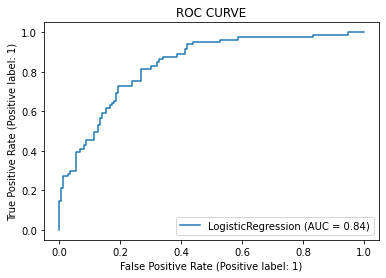

In [9]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title('ROC CURVE')
plt.show()

In [10]:
roc_auc_score(y_test,lr.predict_proba(X_test)[:,1])

0.8375308641975309

#### 4.	What is outlier detection? Why is it useful? What methods can you use for outlier detection?

Outlier detection is to separate a core of regular observations from some polluting ones, called outliers.It helps to improve the performance of the models.

The scikit-learn library provides a number of built-in automatic methods for identifying outliers in data.
- Isolation Forest based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.

- Minimum Covariance Determinant can be generalized by defining a hypersphere (ellipsoid) that covers the normal data, and data that falls outside this shape is considered an outlier.

- Local Outlier Factor attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.

- One-Class SVM captures the density of the majority class and classifies examples on the extremes of the density function as outliers. 

#### 5. Perform a linear SVM to predict credit approval (last column) using this dataset: 
a.	How did the SVM model perform? 

In [11]:
df = pd.read_csv("australian.dat", sep="\s+",header=None)

In [12]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [13]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42,stratify=y)

In [15]:
classifier = SVC(kernel='linear')

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        60
           1       0.90      0.71      0.79        78

    accuracy                           0.79       138
   macro avg       0.80      0.80      0.79       138
weighted avg       0.81      0.79      0.79       138



SVM performed signicantly better than baseline Logistic Regression Model(no resampling) for patients with diabetes class: precision improved from 0.68 to 0.90 and recall improved from 0.52 to 0.71. The precision and recall scores for patients without diabetes were in the same range.

#### 6.	What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words. !

I am interested in data analyst, data scientist job and data engineering. I would like to start my career as a data analyst and eventually work my way up to data scientist if I end up pursuing masters in the related field.

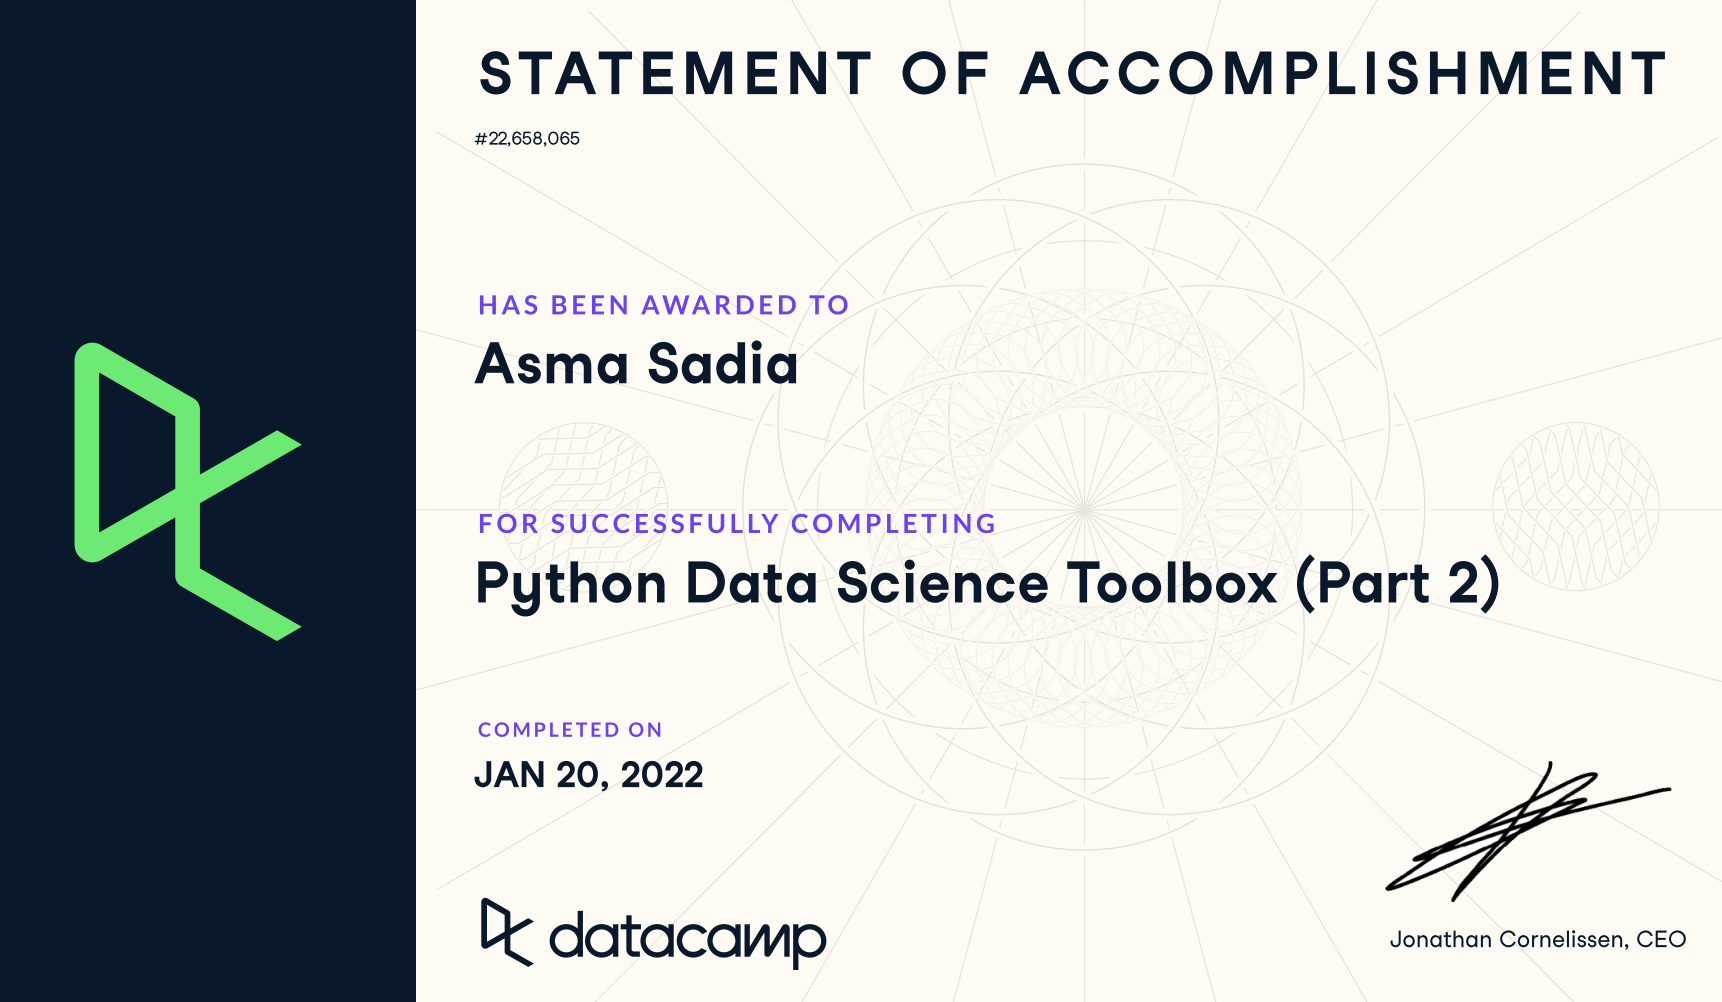

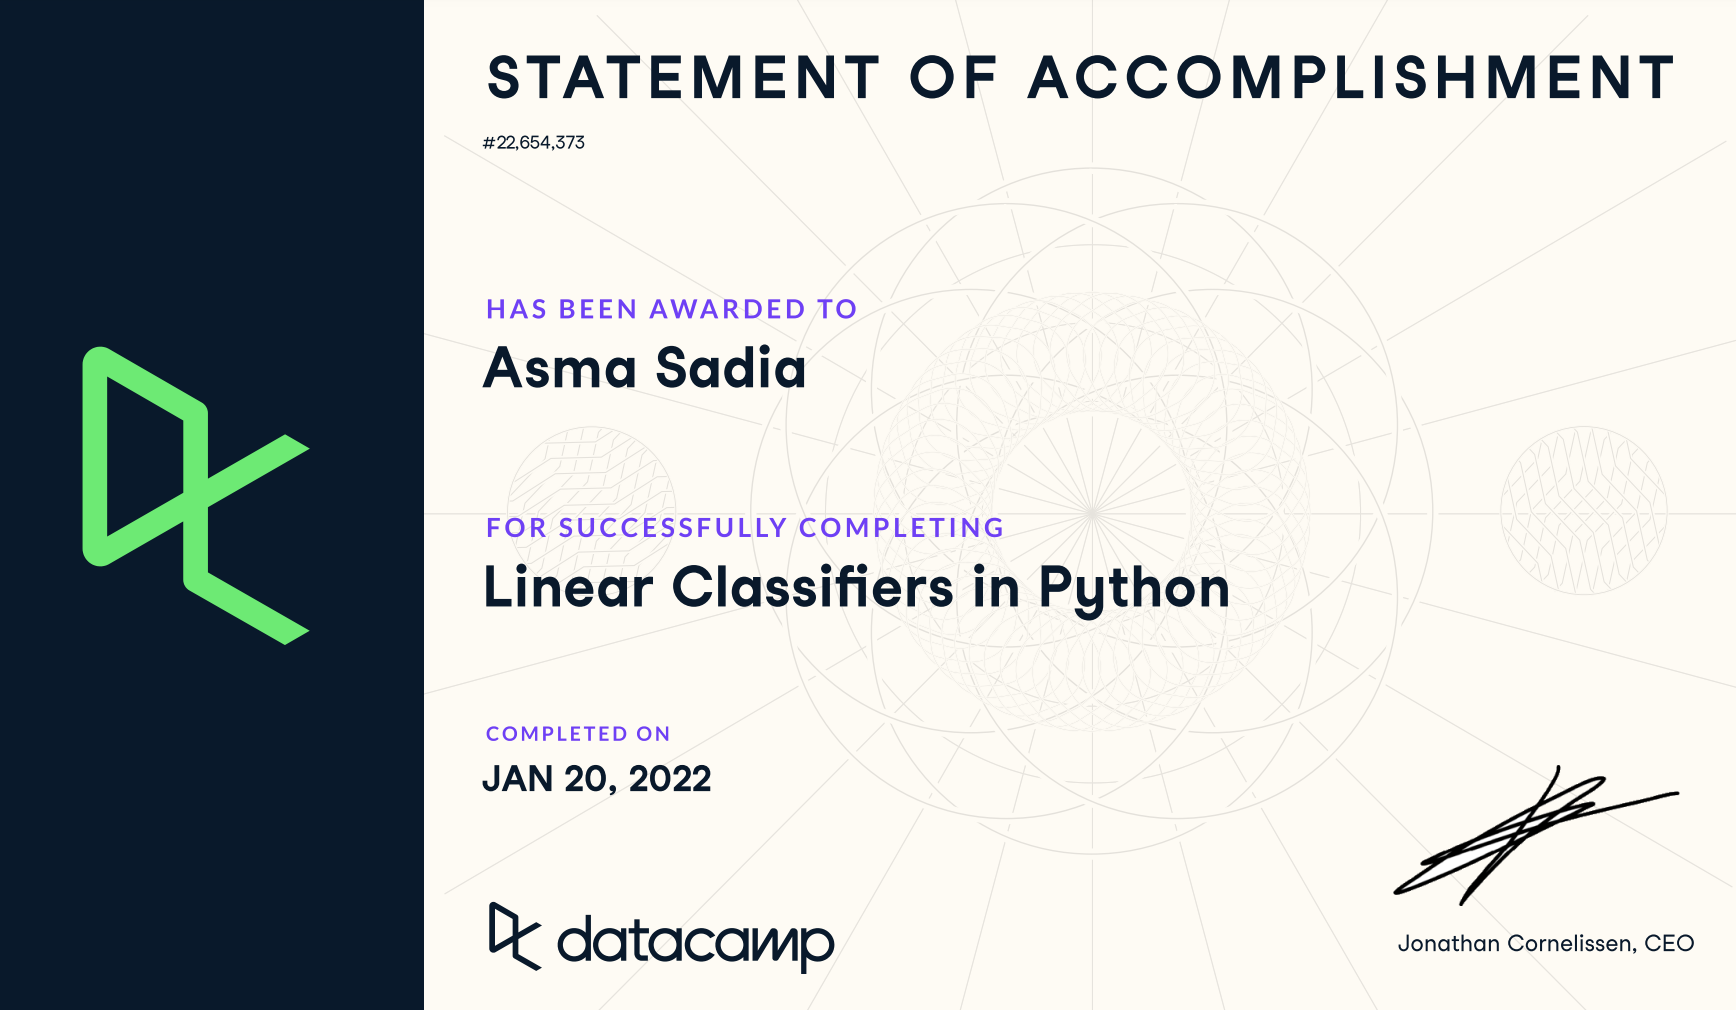